In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [3]:
glass = pd.read_excel('glass.xlsx')                 # import dataset glass.xlsx
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


## Histogram plot of RI value

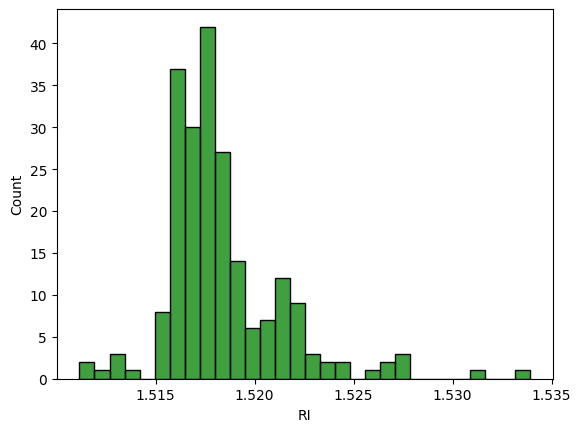

In [5]:
sns.histplot(glass['RI'], bins=30,color='green')   # plotted histogram for represent variable 'Refractive Index'
plt.show()

In [6]:
# Histogram shows RI values from approximately ranges from 1.513 to 1.534 
# Each bin represents the RI value, frequency between 1.516 to 1.519 are higher data values.
# The bins 1.530 to 1.535 could be considered potential outliers

## Box plot for AI value

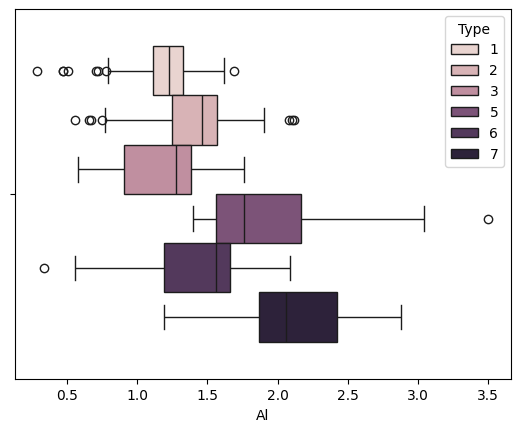

In [7]:
sns.boxplot(data = glass, x='Al', hue='Type')
plt.show()

In [8]:
# boxplot represent type 5,6,7 are seem higher Aluminium value.
# outlier are present in type 1,2

## Pairplot

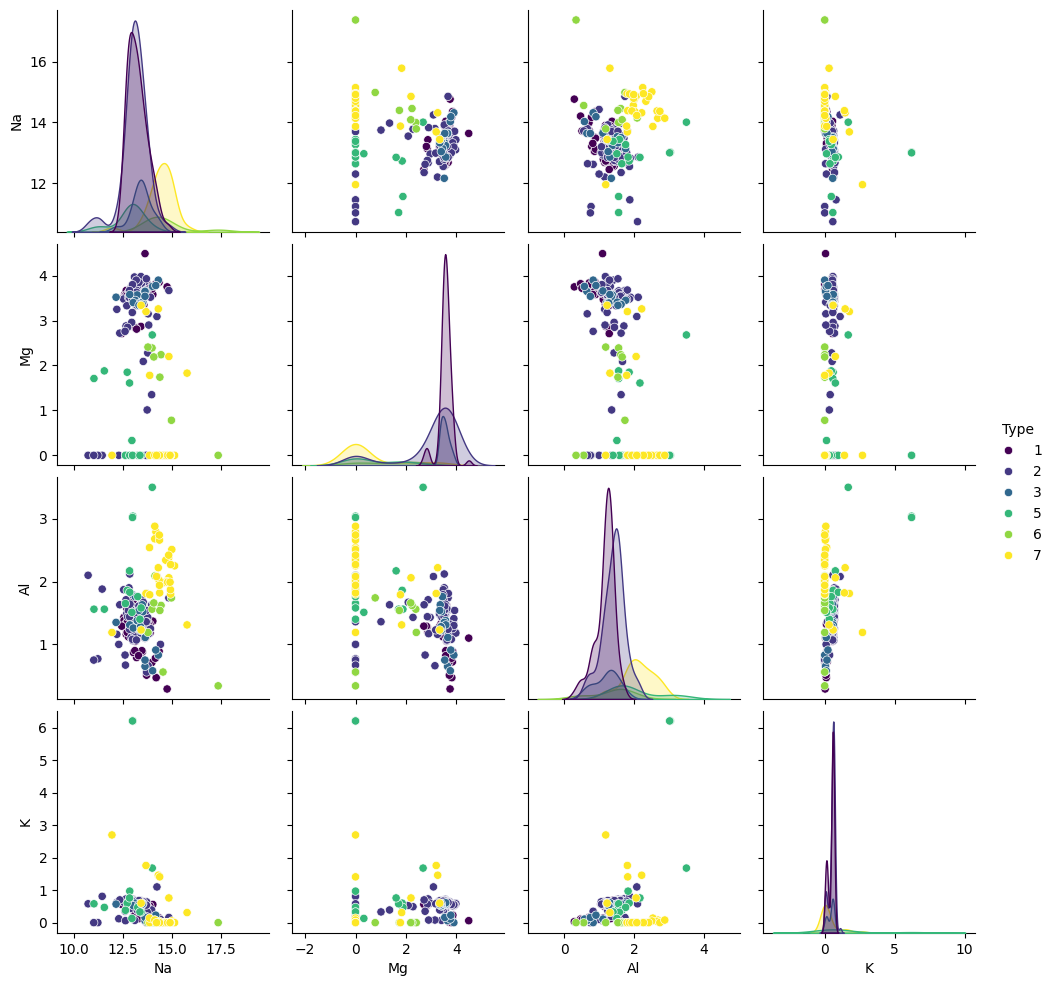

In [9]:
sns.pairplot(glass,vars=['Na','Mg','Al','K'],hue='Type',palette='viridis')
plt.show()

In [10]:
# Some types have more spread-out values, while others are clustered
# Some scatterplots show clear groupings, indicating that certain types of glass have similar chemical compositions.
# in the Na vs Mg plot, some types overlap, while others are distinct.

## Split dataset as x and y

In [11]:
X = glass.iloc[:,:9]
y = glass.iloc[:,9:]

In [12]:
X.head()    # independent variables assigned as X 

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [13]:
y.head()         # dependent variables asssigned here as y which is target variable

,Type
0,1
1,1
2,1
3,1
4,1


In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)    # split x and y data for train, test purpose, test data taken as 20%
X_train.shape,X_test.shape,y_train.shape,y_test.shape               # train, test data shape are printed

((171, 9), (43, 9), (171, 1), (43, 1))

## Hyperparameters tuning 

In [15]:
rf_model = RandomForestClassifier(random_state=42)   # randomforestclassifier declared

In [16]:
# values are given to assess generalise hyperparameters
n_estimators = [int(x) for x in np.linspace(start=10, stop=80, num=10)]    
max_features = ['auto','sqrt']
max_depth = [2,4,8,12,16]
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
bootstrap = [True,False]

In [17]:
# Assign hyperparameter values
param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
          'max_depth':max_depth,
          'min_samples_split':min_samples_split,
         'min_samples_leaf': min_samples_leaf,
         'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 8, 12, 16], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [18]:
from sklearn.model_selection import GridSearchCV     # to tune hyperparameter GridSearchCV method is used from sklearn library

In [19]:
rf_grid = GridSearchCV(estimator=rf_model, param_grid=param_grid,cv = 3,n_jobs=3,verbose=2) # parameters are assigned to get fitted values of Grid method

In [20]:
rf_grid.fit(X_train,y_train)         # Tuned grid method assigned to train data

Fitting 3 folds for each of 1800 candidates, totalling 5400 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=3,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [2, 4, 8, 12, 16],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [21]:
rf_grid.best_params_                  # prints best parameters

{'bootstrap': False,
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 25}

In [22]:
yhat_train = rf_grid.predict(X_train)     # predicted values from X_train data

In [23]:
yhat_test = rf_grid.predict(X_test)       # predicted values from X_test data

In [24]:
confusion_matrix(y_train,yhat_train)        # prints confusion matrix of actual train values and predicted train values

array([[53,  0,  0,  0,  0,  0],
       [ 0, 59,  0,  0,  0,  0],
       [ 1,  0, 14,  0,  0,  0],
       [ 0,  0,  0, 12,  0,  0],
       [ 0,  0,  0,  0,  8,  0],
       [ 0,  0,  0,  0,  0, 24]])

In [25]:
print(classification_report(y_train,yhat_train))      # prints the classification report of training data

              precision    recall  f1-score   support

           1       0.98      1.00      0.99        53
           2       1.00      1.00      1.00        59
           3       1.00      0.93      0.97        15
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00        24

    accuracy                           0.99       171
   macro avg       1.00      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



In [26]:
confusion_matrix(y_test,yhat_test)      # prints confusion matrix of actual test values and predicted test values

array([[13,  4,  0,  0,  0,  0],
       [ 1, 16,  0,  0,  0,  0],
       [ 1,  0,  1,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0,  4]])

In [27]:
print(classification_report(y_test,yhat_test))      # prints classification report of test values

              precision    recall  f1-score   support

           1       0.87      0.76      0.81        17
           2       0.73      0.94      0.82        17
           3       1.00      0.50      0.67         2
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1
           7       1.00      0.80      0.89         5

    accuracy                           0.81        43
   macro avg       0.77      0.67      0.70        43
weighted avg       0.82      0.81      0.80        43



In [28]:
# this model almost fitting the training data

## Bagging method

In [31]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [41]:
tree_model = DecisionTreeClassifier()       # defined DecisionTreeClassifier as base estimator.
bagg_model = BaggingClassifier(estimator = tree_model, n_estimators=50,random_state=42)  # created BaggingClassifier with build 50 decision tree.

In [42]:
bagg_model.fit(X_train,y_train)     # bagging model fit into training data

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50,
                  random_state=42)

In [43]:
yhat_train = bagg_model.predict(X_train)    # prints predicted values from training data

In [44]:
confusion_matrix(y_train,yhat_train)    # Confustion matrix shows 100% accuracy

array([[53,  0,  0,  0,  0,  0],
       [ 0, 59,  0,  0,  0,  0],
       [ 0,  0, 15,  0,  0,  0],
       [ 0,  0,  0, 12,  0,  0],
       [ 0,  0,  0,  0,  8,  0],
       [ 0,  0,  0,  0,  0, 24]])

In [45]:
print(classification_report(y_train,yhat_train))   # classification report also interpret 100% accuracy value

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        59
           3       1.00      1.00      1.00        15
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00        24

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



In [46]:
yhat_test = bagg_model.predict(X_test)    # model predicting from test data

In [38]:
confusion_matrix(y_test,yhat_test)  

array([[15,  2,  0,  0,  0,  0],
       [ 3, 13,  1,  0,  0,  0],
       [ 1,  0,  1,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0,  4]])

In [47]:
print(classification_report(y_test,yhat_test))   # prints classification report shows 79% accuracy test data

              precision    recall  f1-score   support

           1       0.79      0.88      0.83        17
           2       0.81      0.76      0.79        17
           3       0.50      0.50      0.50         2
           5       0.00      0.00      0.00         1
           6       0.50      1.00      0.67         1
           7       1.00      0.80      0.89         5

    accuracy                           0.79        43
   macro avg       0.60      0.66      0.61        43
weighted avg       0.78      0.79      0.78        43



In [48]:
# the training performance is perfect, the test performance is lower 
# the model is overfitting. some classes were very few samples which are not predicted well.

## Boosting method

In [104]:
from sklearn.ensemble import AdaBoostClassifier    # AdaBoostClassifier method from ensemble class

In [123]:
ada_model = AdaBoostClassifier(n_estimators=100, learning_rate=1.0)   # 100 of weak learners was set, learning rate assigned as 1.0

In [124]:
ada_model.fit(X_train,y_train)   # adaclassifier model fit into the training data

AdaBoostClassifier(n_estimators=100)

In [125]:
yhat_train = ada_model.predict(X_train)    # predicted train values

In [126]:
confusion_matrix(y_train,yhat_train)   # confusion matrix shows some of classes are misclassified

array([[44,  8,  1,  0,  0,  0],
       [28, 28,  0,  3,  0,  0],
       [15,  0,  0,  0,  0,  0],
       [ 0,  9,  0,  2,  0,  1],
       [ 0,  0,  0,  0,  8,  0],
       [ 0,  0,  0,  0,  0, 24]])

In [127]:
print(classification_report(y_train,yhat_train))    # Classification report shows 62% accuracy values

              precision    recall  f1-score   support

           1       0.51      0.83      0.63        53
           2       0.62      0.47      0.54        59
           3       0.00      0.00      0.00        15
           5       0.40      0.17      0.24        12
           6       1.00      1.00      1.00         8
           7       0.96      1.00      0.98        24

    accuracy                           0.62       171
   macro avg       0.58      0.58      0.56       171
weighted avg       0.58      0.62      0.58       171



In [128]:
yhat_test = ada_model.predict(X_test)     # prints predicted test values

In [121]:
confusion_matrix(y_test,yhat_test)        

array([[14,  3,  0,  0,  0,  0],
       [15,  2,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  1,  4]])

In [129]:
print(classification_report(y_test,yhat_test))   # prints classification report seems 49% accuracy value.

              precision    recall  f1-score   support

           1       0.45      0.82      0.58        17
           2       0.33      0.12      0.17        17
           3       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       0.50      1.00      0.67         1
           7       1.00      0.80      0.89         5

    accuracy                           0.49        43
   macro avg       0.38      0.46      0.39        43
weighted avg       0.44      0.49      0.42        43



In [130]:
# this ada boost classification model is overfitting, as Training accuracy (62%) is higher than test accuracy (49%), indicating the model learned the training data well but couldn't generalize

In [131]:
# comparing Adaboost model with bagging model, bagging model performs well though it is overfitting.

In [132]:
# Bagging method : 
#        Bagging is an ensemble learning method that improves the stability and accuracy of machine learning algorithm by training multiple models on different
#        random subsets of the dataset and aggregating their predictions.

In [133]:
# Boosting method :
# Boosting is an ensemble technique that combines multiple weak learners sequentially to create a strong learner. 
# Each subsequent model focuses on correcting the mistakes of the previous ones

In [135]:
# Explain how to handle imbalance in the data
#     Techniques to handle imbalanced data
#    1. Resampling Techniques - Duplicate or (SMOTE) Synthetically create new samples of the minority class
#    2. Using class weights - Penalize mistakes in the minority class more heavily.
#    3. Choosing the Right Evaluation Metrics - Accuracy is misleading when data is imbalanced
#    4. Threshold Moving - Adjust the probability threshold for classification to favor the minority class